## Task 1 (20pkt)

**(2p)** Load data from URL http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric into `DataFrame`. Data doesn't have a header. Use URL directly in a function call, not a local file.

In [219]:
import pandas as pd
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
                 , header=None, delimiter="\s+")

In [220]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


**(1p)** Rename last column to `target`. Column informs about the client's default - 2 => default, 1=> not default. Recode `target` so that defaulting clients are marked as 1 and 0 otherwise.

In [221]:
df = df.rename(columns={col: f'v{idx}' for idx, col in enumerate(df.columns[:-1], start=1)})
df = df.rename(columns={df.columns[-1]: 'target'})

In [222]:
df['target'] = df['target'].apply(lambda x: 1 if x == 2 else 0)

In [223]:
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v16,v17,v18,v19,v20,v21,v22,v23,v24,target
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,0
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,1
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,0
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,0
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,1


**(3p)** Check and provide count of `target` categories. How can one solve unbalanced data problem? Give 3 examples.

In [224]:
target_counts = df['target'].value_counts()
print("Count of target categories:")
target_counts

Count of target categories:


0    700
1    300
Name: target, dtype: int64

## How to handle Imbalanced Data Problem:
#### 1. Oversampling
#### 2. Undersampling
#### 3. SMOTE

**(2p)** Split data into training **(85%)** and validation **(15%)** datasets with random seed of **32**. Target variable is `target`, all other variables are predictors.

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=32)

**(2p)** Train `sklearn.linear_model.LogisticRegression`. Make sure the model **is not** regularized. How many parameters in the model are different from 0?

In [227]:
from sklearn.linear_model import LogisticRegression as LR

In [228]:
REG = LR(penalty='none', max_iter=1000)
REG.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [229]:
params_no_0 = (REG.coef_ != 0).sum() + (REG.intercept_ != 0).sum()
print("Number of parameters in the model that are different from 0:", params_no_0)

Number of parameters in the model that are different from 0: 25


**(2p)** Perform feature selection (train new `sklearn.linear_model.LogisticRegression` model) by setting proper regularization type. Set random seed to **11** and set hyperparameter responsible for strength of regularization to **0.5**. How many model's parameters are different from 0? 

### I've used the L1 Regularisation because it also can perform feature selection

In [230]:
REG_l1 = LR(penalty='l1', C=0.5, solver='liblinear', random_state=11)

In [231]:
REG_l1.fit(X_train, y_train)

LogisticRegression(C=0.5, penalty='l1', random_state=11, solver='liblinear')

In [232]:
PR_l1 = (REG_l1.coef_ != 0).sum() + (REG_l1.intercept_ != 0).sum()
print("Number of parameters in the model that are different from 0:", PR_l1)

Number of parameters in the model that are different from 0: 21


#### We can clearly see that the number of parameters that are different from 0 has decreased

**(2p)** How **Elastic net** is connected with **L1** and **L2** regularization?

#### Elastic Net regularization blends the L1 (Lasso) and L2 (Ridge) regularization techniques by integrating both penalties into the loss function. This approach aids in feature selection akin to L1 regularization while effectively managing multicollinearity as L2 regularization does.

#### The Elastic Net penalty entails a convex amalgamation of the L1 and L2 penalties, governed by a mixing parameter (alpha). At an alpha value of 1, it mirrors L1 regularization (Lasso), while at 0, it mirrors L2 regularization (Ridge). Intermediate alpha values permit a spectrum of L1 and L2 regularization combinations.

**(3p)** Using model after feature selection calculate cost of predictions on validation data. False Positive cost is **2**, and False Negative is **5**. Use cut-off threshold of **0.4**.

In [233]:
y_pred_prob = logreg_l1.predict_proba(X_val)[:, 1]

In [234]:
y_pred = (y_pred_prob >= 0.4).astype(int)

In [235]:
from sklearn.metrics import confusion_matrix

In [236]:
confusion_matrix = pd.crosstab(y_val, y_pred, rownames=['Actual'], colnames=['Predicted'])

In [237]:
confusion_matrix

Predicted,0,1
Actual,,
0,87,13
1,21,29


## I'm using the following formula to calculate the total cost:
#### Total cost = false positives * FP rate + false negatives * FN rate 

In [238]:
false_positives = confusion_matrix.loc[0, 1]
false_negatives = confusion_matrix.loc[1, 0]

In [239]:
false_positives

13

In [240]:
false_negatives

21

In [241]:
total_cost = 2 * false_positives + 5 * false_negatives

print("Cost of predictions on validation data:", total_cost)

Cost of predictions on validation data: 131


**(3p)** Given the following confusion matrix:

Predictions are in columns, true labels in rows.

| A\P | 1   | 0   |
|-----|-----|-----|
| 1   | 123 | 321 |
| 0   | 324 | 456 |

Calculate:
* Accuracy
* Precision
* Recall
* F1-score

In [242]:
FP = 324
FN = 321
TP = 123
TN = 456

In [243]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1_score = 2 * (Precision * Recall) / (Precision + Recall)

In [244]:
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall (Sensitivity):", Recall)
print("F1-score:", F1_score)

Accuracy: 0.4730392156862745
Precision: 0.2751677852348993
Recall (Sensitivity): 0.27702702702702703
F1-score: 0.27609427609427606


## Task 2 (12 pkt)

**(1p)** Load data from URL https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv into `DataFrame`. Use URL directly in a function call, not a local file.

In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [246]:
dataset = pd.read_csv(
    "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv",
    sep=',',
    header=0)

In [247]:
dataset.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


**(1p)** Drop all qualitative variables from the dataset.

In [248]:
data_types = dataset.dtypes
data_types

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

### Qualitiative variables are SEX and Name (object type)

In [249]:
dataset.drop(columns=['Name','Sex'], inplace=True)

In [250]:
dataset.head(5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


**(1p)** Split data into training **(85%)** and validation **(15%)** datasets with random seed of **42**. Target variable is 'Survived', all other variables are predictors.

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
X = dataset.drop(columns='Survived')
y = dataset.Survived
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    random_state=42)

**(1p)** Train `sklearn.tree.DecisionTreeClassifier` model with random seed of **42** i and cost parameter equal to **0**.

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

In [254]:
dt_classifier = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

**(3p)** How and why CART tree pruning is performed?

### Tree pruning serves to mitigate overfitting by simplifying the tree structure. This process entails the removal of nodes that contribute insignificantly to predictive accuracy. By regulating a complexity parameter (e.g., cost-complexity parameter in scikit-learn), pruning penalizes excessive complexity during model training, thereby promoting a more concise and generalizable tree model.

**(2p)** Prune trained tree by optimizing complexity parameter. Use **grid search** for **50** values of complexity parameter from 0 to maximum value of cost obtained from `cost_complexity_pruning_path` used on trained tree (use training dataset while calling the method). Use **accuracy** as quality metric. Use random seed of **42** for all model trained during tuning.

In [255]:
imdb_tree = dt_classifier.fit(X_train,y_train)

In [256]:
path = imdb_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[::4]

In [257]:
ccp_alphas

array([0.        , 0.00017707, 0.00033201, 0.00044267, 0.00062495,
       0.00075887, 0.00084417, 0.00088535, 0.00088535, 0.00094859,
       0.00099602, 0.00101183, 0.00108898, 0.0011383 , 0.00119522,
       0.00126846, 0.00133856, 0.00151686, 0.00161576, 0.00189754,
       0.00202365, 0.00231552, 0.00264469, 0.00327402, 0.00464888,
       0.01447387])

In [258]:
max_cost = max(ccp_alphas)
max_cost

0.014473874408437809

In [259]:
param_grid = {'ccp_alpha': np.linspace(0, max_cost, 50)}
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

**(3p)** What is the optimal value of cost parameter? Provide accuracy of pruned tree on training and validation datasets - comment if the model is overfitted.

In [260]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.00029539, 0.00059077, 0.00088616, 0.00118154,
       0.00147693, 0.00177231, 0.0020677 , 0.00236308, 0.00265847,
       0.00295385, 0.00324924, 0.00354462, 0.00384001, 0.00413539,
       0.00443078, 0.00472616, 0.00502155, 0.00531693, 0.00561232,
       0.0059077 , 0.00620309, 0.00649847, 0.00679386, 0.00708924,
       0.00738463, 0.00768001, 0.0079754 , 0.00827079, 0.00856617,
       0.00886156, 0.00915694, 0.00945233, 0.00974771, 0.0100431 ,
       0.01033848, 0.01063387, 0.01092925, 0.01122464, 0.01152002,
       0.01181541, 0.01211079, 0.01240618, 0.01270156, 0.01299695,
       0.01329233, 0.01358772, 0.0138831 , 0.01417849, 0.01447387])},
             scoring='accuracy')

In [261]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'ccp_alpha': 0.0032492371120982832}


In [262]:
y_train_pred = grid_search.predict(X_train)
taccuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on Training Data:", taccuracy)

Accuracy on Training Data: 0.7808764940239044


In [263]:
y__pred = grid_search.predict(X_test)
vaccuracy = accuracy_score(y_test, y__pred)
print("Accuracy on Validation Data:", vaccuracy)

Accuracy on Validation Data: 0.7014925373134329


#### The accuracy on the training data is slightly higher than on the validation data. It is possible that the model is slightly overfitted, but the difference in accuracy is very small and we are not able to prove that

## Task 3 (18 pkt)

**(1p)** Load data from URL https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv into DataFrame. Use URL directly in a function call, not a local file.

In [264]:
import pandas as pd
import numpy as np

In [265]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", 
                        sep=';')

**(1p)** Check if dataset contains missing data.

In [266]:
wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### No, it does not contain missing data

**(2p)** Create a scatterplot with overlayed linear regression. Use variables:
* y axis - `alcohol`
* x axis - `residual sugar`

In [267]:
import matplotlib.pyplot as plt

In [268]:
x = wine_data['residual sugar']
y = wine_data['alcohol']

In [269]:
slope, intercept = np.polyfit(x, y, 1)

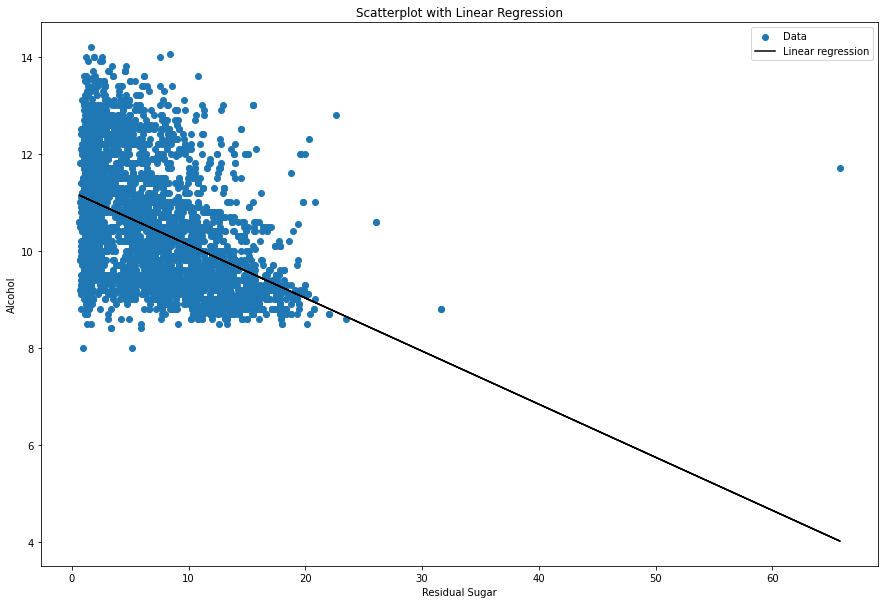

In [270]:
plt.figure(figsize = (15,10))
plt.scatter(x, y, label='Data')
plt.plot(x, slope*x + intercept, color='black', label='Linear regression')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.title('Scatterplot with Linear Regression')
plt.legend()
plt.show()

**(3p)** Plot highlights presence of outliers - remove them with z-score method. Calculate z-score for all observations in the dataset and remove rows in which, at least one variable is greater than **4** standard deviations from mean. Generate chart from previous point again to confirm outliers removal.

In [271]:
from scipy import stats
ZS = np.abs(stats.zscore(wine_data))

In [272]:
ZS.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,0.081770,0.213280,2.821349,0.035355,0.569932,0.744565,2.331512,1.246921,0.349184,1.393152,0.13787
1,0.657501,0.215896,0.048001,0.944765,0.147747,1.253019,0.149685,0.009154,0.740029,0.001342,0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,0.312141,0.973336,0.358665,0.475102,0.436816,0.336667,0.13787
3,0.409125,0.478657,0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,0.787342,0.499203,0.13787
4,0.409125,0.478657,0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,0.787342,0.499203,0.13787


In [273]:
wine_no_out = wine_data[(ZS < 4).all(axis=1)]

In [274]:
x_no_out = wine_no_out['residual sugar']
y_no_out = wine_no_out['alcohol']

In [275]:
slope_no_outliers, intercept_no_outliers = np.polyfit(x_no_out, y_no_out, 1)

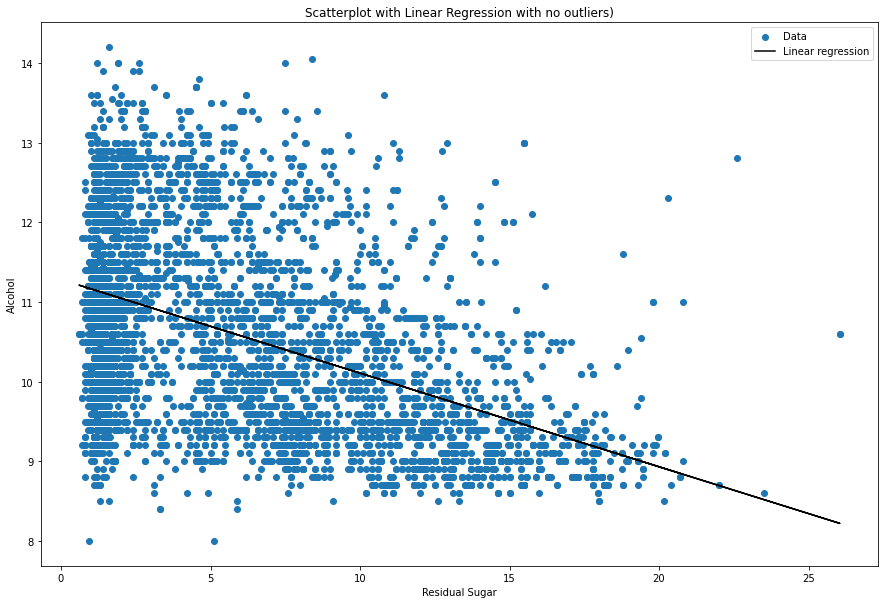

In [276]:
plt.figure(figsize = (15,10))
plt.scatter(x_no_out, y_no_out, label='Data')
plt.plot(x_no_out, slope_no_outliers*x_no_out + intercept_no_outliers, color='black', label='Linear regression')
plt.xlabel('Residual Sugar')
plt.ylabel('Alcohol')
plt.title('Scatterplot with Linear Regression with no outliers)')
plt.legend()
plt.show()

**(1p)** Recode `quality` column. Good wines (quality greater or equal **6**) should be marked as 1, while bad wines (quality lower than 6) marked as 0. Overwrite `quality` column.

In [277]:
wine_data['quality'] = wine_data['quality'].map(lambda q: 1 if q >= 6 else 0)

In [278]:
wine_data['quality'].unique()

array([1, 0], dtype=int64)

**(1p)** Split data into training **(80%)** and test **(20%)** subsets with random seed of **42**. Target variable is `quality`, all other variables are predictors.

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

**(2p)** Tune the `sklearn.ensemble.RandomForestClassifier` model. Optimize `max_samples` hyperparameter using grid search (check values 0.1, 0.2, ..., 1.0) - use 3-fold crossvalidation and F1-score as quality metric. For every trained model use random seed of **10**. Other hyperparameters in the model leave with default values. 

In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [282]:
RF = RandomForestClassifier(random_state=10)

In [283]:
param_grid = {'max_samples': np.arange(0.1, 1.1, 0.1)}

In [284]:
sc = make_scorer(f1_score)

In [285]:
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=3, scoring=sc)

In [286]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_samples': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring=make_scorer(f1_score))

In [287]:
grid_search.best_params_

{'max_samples': 1.0}

In [288]:
grid_search.best_score_

0.8671361927626098

**(2p)** Which 2 features are the most important based on **feature importance** of optimal random forest? Give their names.

In [289]:
BEST_RF = grid_search.best_estimator_
BEST_RF

RandomForestClassifier(max_samples=1.0, random_state=10)

In [290]:
feature_importances = BEST_RF.feature_importances_

In [291]:
feature_names = X_train.columns
feature_names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [292]:
feature_importance_dict = dict(zip(feature_names, feature_importances))
feature_importance_dict

{'fixed acidity': 0.06681266079322096,
 'volatile acidity': 0.12158977400106763,
 'citric acid': 0.07813930165051018,
 'residual sugar': 0.08325170437242231,
 'chlorides': 0.07930897013087998,
 'free sulfur dioxide': 0.09904832163690036,
 'total sulfur dioxide': 0.08642742930008962,
 'density': 0.10508582568249018,
 'pH': 0.0716441519453564,
 'sulphates': 0.06345259304562777,
 'alcohol': 0.14523926744143467}

In [293]:
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), 
                                        key=lambda item: item[1], reverse=True))
sorted_feature_importance

{'alcohol': 0.14523926744143467,
 'volatile acidity': 0.12158977400106763,
 'density': 0.10508582568249018,
 'free sulfur dioxide': 0.09904832163690036,
 'total sulfur dioxide': 0.08642742930008962,
 'residual sugar': 0.08325170437242231,
 'chlorides': 0.07930897013087998,
 'citric acid': 0.07813930165051018,
 'pH': 0.0716441519453564,
 'fixed acidity': 0.06681266079322096,
 'sulphates': 0.06345259304562777}

In [294]:
print('The most important features according to RF are the following:')
list(sorted_feature_importance.items())[:2]

The most important features according to RF are the following:


[('alcohol', 0.14523926744143467), ('volatile acidity', 0.12158977400106763)]

**(3p)** Tune `sklearn.ensemble.GradientBoostingClassifier`. 

Using grid search, tune two hyperparameters:
1. number of learning iterations (check values from 50 to 200 with step of 50)
2. fraction of training observations used in each iteration (check values 0.33, 0.66 and 1.0)

Use 3-fold crossvalidation and F1-score as quality metric. Use random seed of **12** for each model. Other hyperparameters in the model leave with default values.

In [295]:
from sklearn.ensemble import GradientBoostingClassifier

In [296]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.33, 0.66, 1.0]
}

In [297]:
GB = GradientBoostingClassifier(random_state=12)

In [298]:
grid_search = GridSearchCV(estimator=GB, param_grid=param_grid, cv=3, scoring=sc)

In [299]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=12),
             param_grid={'n_estimators': [50, 100, 150, 200],
                         'subsample': [0.33, 0.66, 1.0]},
             scoring=make_scorer(f1_score))

**(2p)** Compare quality of two tuned models (optimal Random Forest, optimal Gradient Boosted Trees) based on F1-score on test data and show the results on bar plot. Which model is better?

In [300]:
rf_preds = BEST_RF.predict(X_test)
rf_f1_score = f1_score(y_test, rf_preds)
rf_f1_score

0.8908554572271387

In [301]:
gb_predictions = grid_search.predict(X_test)
gb_f1_score = f1_score(y_test, gb_predictions)
gb_f1_score

0.8464364437913299

In [302]:
models = ['Random Forest', 'Gradient Boosted Trees']
f1_scores = [rf_f1_score, gb_f1_score]

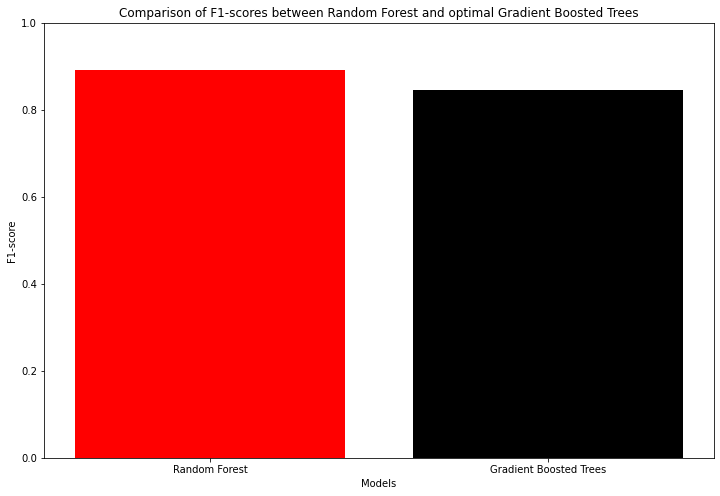

In [303]:
plt.figure(figsize=(12,8))
plt.bar(models, f1_scores, color=['red', 'black'])
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.title('Comparison of F1-scores between Random Forest and optimal Gradient Boosted Trees')
plt.ylim(0, 1)
plt.show()